In [2]:
import mido
import numpy as np
import matplotlib.pyplot as plt
#test
import Parser

In [3]:
dataset = Parser.load_dataset("adl-piano-midi")

In [4]:
songs = Parser.files_to_songs(dataset["Reggae"])

In [5]:
type(songs)
for song in songs:
    print(type(song))
    print(songs[song])

<class 'str'>
[[0, 58, 95, 0], [0, 62, 95, 0], [0, 63, 95, 0], [0, 67, 95, 0], [0, 62, 0, 384], [0, 63, 0, 0], [0, 67, 0, 0], [0, 58, 0, 0], [0, 56, 95, 0], [0, 60, 95, 0], [0, 63, 95, 0], [0, 67, 95, 0], [0, 60, 0, 768], [0, 56, 0, 0], [0, 67, 0, 0], [0, 63, 0, 0], [0, 58, 95, 0], [0, 62, 95, 0], [0, 63, 95, 0], [0, 67, 95, 0], [0, 62, 0, 384], [0, 63, 0, 0], [0, 58, 0, 0], [0, 67, 0, 0], [0, 56, 95, 0], [0, 60, 95, 0], [0, 63, 95, 0], [0, 67, 95, 0], [1, 79, 68, 0], [1, 79, 0, 0], [1, 84, 72, 0], [1, 86, 80, 0], [1, 84, 0, 0], [1, 91, 68, 0], [1, 86, 0, 0], [0, 67, 0, 0], [0, 60, 0, 0], [0, 56, 0, 0], [1, 96, 72, 0], [0, 63, 0, 0], [1, 91, 0, 0], [0, 58, 95, 0], [0, 62, 95, 0], [0, 63, 95, 0], [0, 67, 95, 0], [1, 91, 72, 0], [1, 96, 0, 0], [1, 91, 0, 0], [0, 62, 0, 384], [0, 63, 0, 0], [0, 67, 0, 0], [0, 58, 0, 0], [0, 56, 95, 0], [0, 60, 95, 0], [0, 63, 95, 0], [0, 67, 95, 0], [0, 60, 0, 768], [0, 56, 0, 0], [0, 67, 0, 0], [0, 63, 0, 0], [0, 58, 95, 0], [0, 62, 95, 0], [0, 63, 95, 0

In [6]:
def extract_notes(songs):
    matrix = []
    for song in songs :
        l = [0]*len(songs[song])
        for i,seq in enumerate(songs[song]) :
            l[i]=seq[1]
        matrix.append(l)
    return matrix

In [7]:
notes = extract_notes(songs)

In [8]:
def create_dict(notes):
    flatt_notes = [element for n in notes for element in n]

    dict_notes = {}
    for note in flatt_notes:
        if note not in dict_notes:
            dict_notes[note] = len(dict_notes)
    return dict_notes

In [9]:
create_dict(notes)

{58: 0,
 62: 1,
 63: 2,
 67: 3,
 56: 4,
 60: 5,
 79: 6,
 84: 7,
 86: 8,
 91: 9,
 96: 10,
 74: 11,
 77: 12,
 82: 13,
 87: 14,
 72: 15,
 89: 16,
 59: 17,
 65: 18,
 75: 19,
 41: 20,
 46: 21,
 48: 22,
 55: 23,
 70: 24,
 44: 25,
 61: 26,
 68: 27,
 51: 28,
 29: 29,
 57: 30,
 28: 31,
 31: 32,
 32: 33,
 33: 34,
 45: 35,
 64: 36,
 53: 37,
 38: 38,
 50: 39,
 36: 40,
 35: 41,
 47: 42,
 34: 43,
 26: 44,
 54: 45,
 43: 46,
 66: 47,
 52: 48,
 69: 49,
 27: 50,
 39: 51,
 76: 52,
 40: 53,
 83: 54,
 80: 55,
 37: 56,
 71: 57,
 49: 58,
 73: 59,
 81: 60,
 24: 61,
 88: 62,
 85: 63,
 78: 64,
 42: 65,
 90: 66,
 92: 67,
 93: 68,
 98: 69,
 30: 70,
 101: 71,
 103: 72,
 104: 73,
 105: 74,
 94: 75,
 95: 76,
 100: 77,
 97: 78}

In [10]:
##C'est applati mais c'est du reggae donc ok ? on pourra découper après ? pck c'était pas évident sinon pour la taille du training set

In [11]:
def one_hot_encoding_train(dict_notes, training_set):
    one_hot_training = np.zeros((training_set.shape[0], training_set.shape[1], len(dict_notes)))
    for i in range(training_set.shape[0]):
        for j in range(training_set.shape[1]):
            one_hot_training[i,j, dict_notes[training_set[i,j]]] = 1
    return one_hot_training


In [12]:
def one_hot_encoding(dict_notes,notes):
    k = len(dict_notes)
    one_hot = np.zeros((len(notes), k))
    for i in range(len(notes)):
        one_hot[i][dict_notes[notes[i]]] = 1
    return one_hot


In [13]:
def treat_notes(notes):
    return [element for n in notes for element in n]


In [14]:
flatt_notes = treat_notes(notes)
dict_notes = create_dict(notes)
flatt_notes = np.array(flatt_notes)
notes_one_hot = one_hot_encoding(dict_notes,flatt_notes)

In [15]:
notes_one_hot

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [16]:
notes_one_hot.shape

(64740, 79)

In [17]:
def create_train_label_notes_only(notes):
    training_set = []
    label_set = []
    for i in range(len(notes)-5):
        training_set.append(notes[i:i+5])
        label_set.append(notes[i+5])
    return training_set, label_set

In [18]:
training_set, label_set = create_train_label_notes_only(flatt_notes)
training_set = np.array(training_set)
label_set = np.array(label_set)

print(training_set.shape)
training_one_hot = one_hot_encoding_train(dict_notes,training_set)
print(training_one_hot.shape)
label_one_hot = one_hot_encoding(dict_notes,label_set)
print(label_one_hot.shape)

(64735, 5)
(64735, 5, 79)
(64735, 79)


In [19]:
from keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN

In [20]:
##Simple RNN model
model = Sequential()
dim = len(dict_notes)
model.add(SimpleRNN(units=dim, input_shape=(5,dim)))
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 79)                12561     
                                                                 
Total params: 12,561
Trainable params: 12,561
Non-trainable params: 0
_________________________________________________________________


In [21]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])  # Compile the model
model.fit(training_one_hot, label_one_hot, epochs=20, batch_size=100)  # Fit the model


Epoch 1/20


648/648 [==============================] - 6s 5ms/step - loss: 8.7106 - accuracy: 0.0164
Epoch 2/20
648/648 [==============================] - 5s 8ms/step - loss: 8.2221 - accuracy: 0.0381
Epoch 3/20
648/648 [==============================] - 4s 6ms/step - loss: 8.2501 - accuracy: 0.0359
Epoch 4/20
648/648 [==============================] - 3s 5ms/step - loss: 8.1382 - accuracy: 0.0316
Epoch 5/20
648/648 [==============================] - 3s 5ms/step - loss: 8.3095 - accuracy: 0.0280
Epoch 6/20
648/648 [==============================] - 3s 5ms/step - loss: 8.3297 - accuracy: 0.0262
Epoch 7/20
648/648 [==============================] - 3s 5ms/step - loss: 8.2515 - accuracy: 0.0296
Epoch 8/20
648/648 [==============================] - 3s 4ms/step - loss: 8.1366 - accuracy: 0.0335
Epoch 9/20
648/648 [==============================] - 3s 5ms/step - loss: 8.1044 - accuracy: 0.0353
Epoch 10/20
648/648 [==============================] - 3s 4ms/step - loss: 8.1069 - accuracy: 0.0411
Epoch 11/2

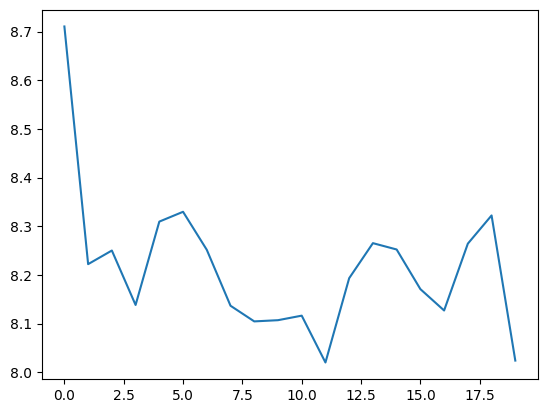

In [22]:
#Print the loss function
loss = model.history.history['loss']
plt.plot(range(len(loss)), loss)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 79)                50244     
                                                                 
Total params: 50,244
Trainable params: 50,244
Non-trainable params: 0
_________________________________________________________________


Epoch 1/20
648/648 [==============================] - 14s 10ms/step - loss: 8.7831 - accuracy: 0.0427
Epoch 2/20
648/648 [==============================] - 6s 10ms/step - loss: 8.6332 - accuracy: 0.0392
Epoch 3/20
648/648 [==============================] - 6s 9ms/step - loss: 8.5862 - accuracy: 0.0600
Epoch 4/20
648/648 [==============================] - 8s 13ms/step - loss: 8.6161 - accuracy: 0.0837
Epoch 5/20
648/648 [==============================] - 6s 10ms/step - loss: 8.7375 - accuracy: 0.0890
Epoch 6/20
648/648 [==============================] - 6s 10ms/step - loss: 8.8690 - accuracy: 0.0716
Epoch 7/20
648/648 [==============================] - 7s 10ms/step - loss: 8.8064 - accuracy: 0.0425
Epoch 8/20
648/648 [==============================] - 7s 10ms/step - loss: 8.6176 - accuracy: 0.0347
Epoch 9/20
648/648 [==============================] - 7s 10ms/step - loss: 8.6159 - accuracy: 0.0309
Epoch 10/20
648/648 [==============================] - 7s 10ms/step - loss: 8.8194 - accura

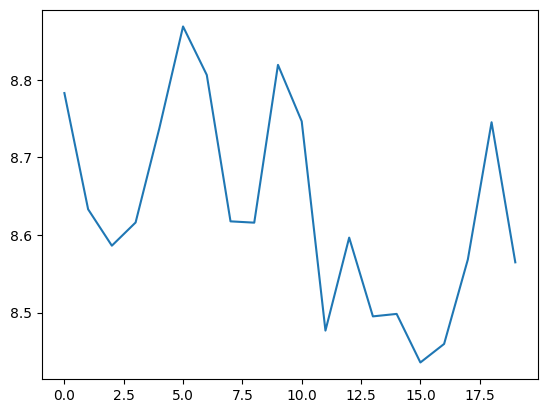

In [23]:
##LSTM Architecture

from tensorflow.keras.layers import LSTM

model = Sequential()
dim = len(dict_notes)
model.add(LSTM(units=dim, input_shape=(5,dim)))
model.summary()

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])  # Compile the model
model.fit(training_one_hot, label_one_hot, epochs=20, batch_size=100)  # Fit the model

#Print the loss function
loss = model.history.history['loss']
plt.plot(range(len(loss)), loss)